In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

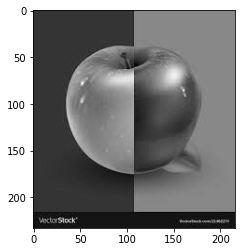

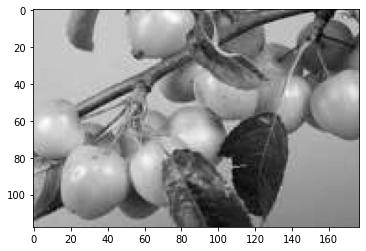

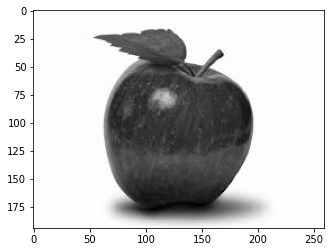

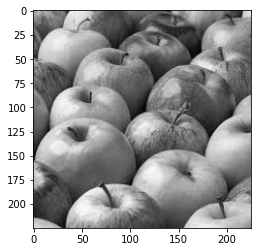

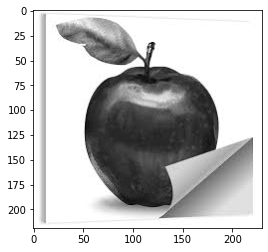

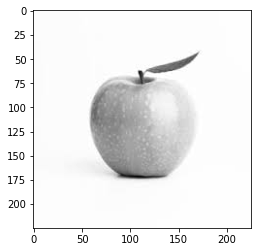

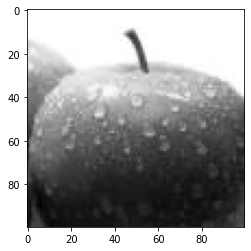

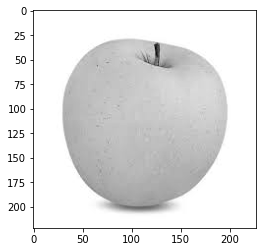

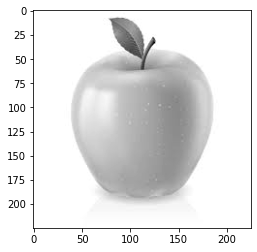

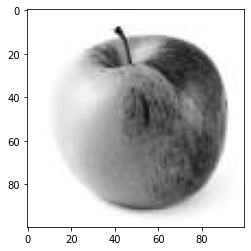

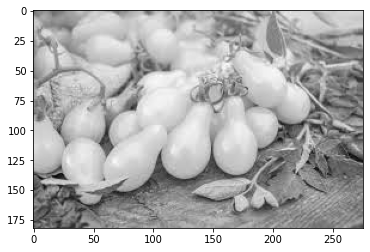

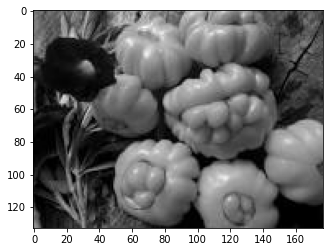

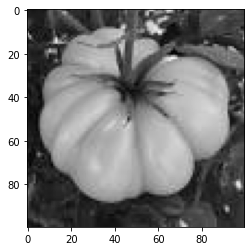

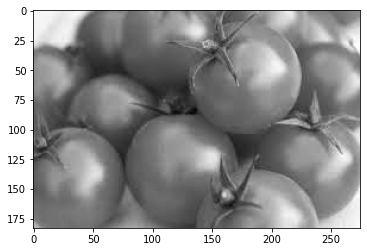

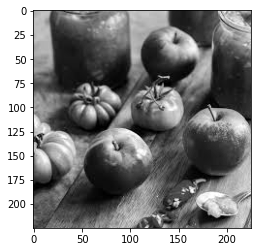

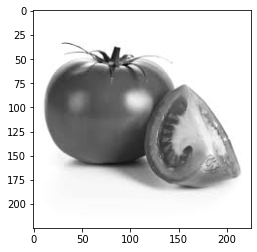

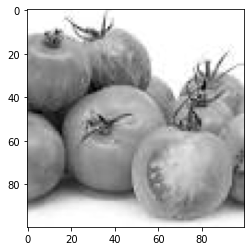

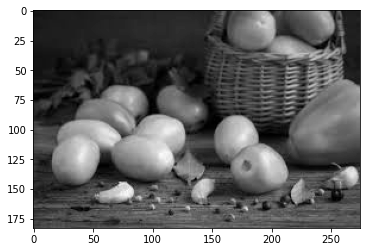

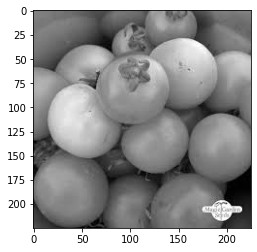

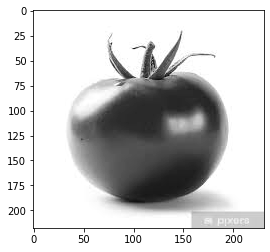

In [25]:
DATADIR = '/content/drive/MyDrive/train'
CATEGORIES = ["apples", "tomatoes"]
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    x=0
    for img in os.listdir(path): 
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  
        plt.show()  
        if x==10 : 
            break    

In [26]:
print(img_array)
print(img_array.shape)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 210 210 210]
 [255 255 255 ... 210 210 210]
 [255 255 255 ... 210 210 210]]
(218, 231)


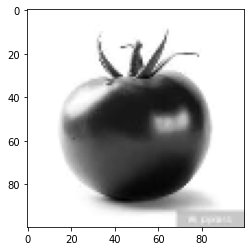

In [91]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [28]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean
                pass
           

create_training_data()

print(len(training_data))

100%|██████████| 143/143 [00:00<00:00, 400.11it/s]

323


In [32]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
0
0
0
1
0
0


In [43]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)
y = np.array(y)

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


In [41]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
 
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [140]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print(y_test.shape)


(226, 100, 100)
(97, 100, 100)
(226,)
(97,)


In [141]:

#X_train[0]
y_test[:10]

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [149]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    # keras.layers.Dense(32, activation=tf.nn.relu),
    # keras.layers.Dense(512, activation=tf.nn.relu),
    # keras.layers.Dense(256, activation=tf.nn.relu),
    # keras.layers.Dense(128, activation=tf.nn.relu),
    # keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [150]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [151]:

#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#y = np.array(y)
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
8/8 [==============================] - 1s 75ms/step - loss: 927.2806 - accuracy: 0.4381
Epoch 2/30
8/8 [==============================] - 1s 76ms/step - loss: 567.7834 - accuracy: 0.4823
Epoch 3/30
8/8 [==============================] - 1s 74ms/step - loss: 602.6658 - accuracy: 0.4735
Epoch 4/30
8/8 [==============================] - 1s 74ms/step - loss: 276.4794 - accuracy: 0.5088
Epoch 5/30
8/8 [==============================] - 1s 74ms/step - loss: 246.9290 - accuracy: 0.5575
Epoch 6/30
8/8 [==============================] - 1s 78ms/step - loss: 99.0198 - accuracy: 0.5841
Epoch 7/30
8/8 [==============================] - 1s 72ms/step - loss: 178.7404 - accuracy: 0.5265
Epoch 8/30
8/8 [==============================] - 1s 73ms/step - loss: 284.6326 - accuracy: 0.5575
Epoch 9/30
8/8 [==============================] - 1s 74ms/step - loss: 429.9253 - accuracy: 0.4779
Epoch 10/30
8/8 [==============================] - 1s 74ms/step - loss: 350.0735 - accuracy: 0.5177
Epoch 11/3

In [152]:
test_loss, test_acc = model.evaluate(X_test,y_test)
test_acc

4/4 [==============================] - 0s 10ms/step - loss: 19.9471 - accuracy: 0.6186


0.6185566782951355

In [153]:
import numpy as np
output= model.predict(X_test)
y_pred=np.argmax (output, axis=1)

4/4 [==============================] - 0s 16ms/step


In [154]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.61      0.74        88
           1       0.15      0.67      0.24         9

    accuracy                           0.62        97
   macro avg       0.55      0.64      0.49        97
weighted avg       0.87      0.62      0.70        97



In [155]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[54  3]
 [34  6]]


In [156]:
model.save('model2.h5')